<a href="https://colab.research.google.com/github/Hyeok-Jun-Yoon/AI_Plus/blob/main/%EA%B8%B0%EB%B3%B8%EA%B3%BC%EC%A0%9C_1%EC%A3%BC%EC%B0%A8_AI_2%EA%B8%B0_%EC%9C%A4%ED%98%81%EC%A4%80_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [기본과제] MNIST 분류(classification) 모델 구현

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.53MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 59.4kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:06<00:00, 244kB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.72MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
batch_size = 64

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

60000
torch.Size([1, 28, 28]) 5


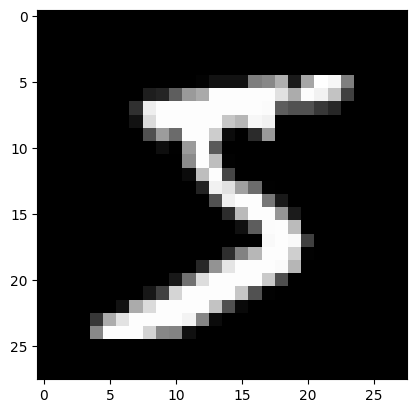

In [4]:
from matplotlib import pyplot as plt

print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[0][0][0], cmap='gray')

## 1. Test data 준비하기

In [3]:
transform = transforms.ToTensor()
testset = torchvision.datasets.MNIST(
    root='./data',
    train=False, #[MY CODE] train=False 설정
    download=True,
    transform=transform
)

In [ ]:
batch_size = 64
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False #[MY CODE] shuffle=False 설정
)

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter) #data 파악을 위해
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


## 2.  `nn.CrossEntropyLoss` 적용하기

In [5]:
from torch import nn

class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()
    # 층 정의, 선형 변환을 수행
    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10) #[MY CODE] model 최종 output 10으로 변경

    # ReLu 입력값이 0보단 크면 출력, 0이하면 0을 출력
    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1) #1D벡터로 평탄화하여 변환
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x) #[MY CODE] 출력은 logits 형태로 출력

    return x

# 중간 피처갯수 정의 하이퍼파라미터
model = Model(28 * 28 * 1, 1024) # [FEDBACK] 궁금중 : 적절한 피처갯수를 선정하는 방법이 있나요?


In [14]:
from torch.optim import SGD
#(Stochastic Gradient Descent)
lr = 0.001
model = model.to('cuda')
#가중치를 점진적으로 수정하면서 손실함수가 최소화되는 방향으로 학습시킴
optimizer = SGD(model.parameters(), lr=lr)

loss_function = nn.CrossEntropyLoss() #[MY CODE] nn.CrossEntropyLoss() 선언

In [ ]:
n_epochs = 30 #GPU사용량 이슈로 반복학습횟수 줄여서 로그 출력

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')
    preds = model(inputs)
    loss = loss_function(preds,labels) #[MY CODE] nn.CrossEntropyLoss() 적용
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
  #[LOG] CrossEntropyLoss를 사용한 loss 합 출력
  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

Epoch   0 | Loss: 539.9852035045624
Epoch   1 | Loss: 536.2177538871765
Epoch   2 | Loss: 532.3398633003235
Epoch   3 | Loss: 528.2312607765198
Epoch   4 | Loss: 523.7475998401642
Epoch   5 | Loss: 518.7788472175598
Epoch   6 | Loss: 513.1747686862946
Epoch   7 | Loss: 506.7923755645752
Epoch   8 | Loss: 499.4509439468384
Epoch   9 | Loss: 490.99937653541565
Epoch  10 | Loss: 481.2947082519531
Epoch  11 | Loss: 470.07003355026245
Epoch  12 | Loss: 457.1808136701584
Epoch  13 | Loss: 442.642165184021
Epoch  14 | Loss: 426.34990441799164
Epoch  15 | Loss: 408.49324548244476
Epoch  16 | Loss: 389.3450607061386
Epoch  17 | Loss: 369.3181149959564
Epoch  18 | Loss: 349.0078512430191
Epoch  19 | Loss: 328.88862788677216
Epoch  20 | Loss: 309.4536083936691
Epoch  21 | Loss: 291.1880210638046
Epoch  22 | Loss: 274.1251256465912
Epoch  23 | Loss: 258.6101365685463
Epoch  24 | Loss: 244.6180972456932
Epoch  25 | Loss: 231.8028057217598
Epoch  26 | Loss: 220.50394940376282
Epoch  27 | Loss: 210.2

In [ ]:
idx = 0

x = trainset[idx][0][None]  # (1, 1, 28, 28)
x = x.to('cuda')

print(model(x))
print(trainset[idx][1])

tensor([[0.0693, 0.0000, 0.0000, 4.2684, 0.0000, 5.8629, 0.0000, 0.0000, 0.0000,
         0.0000]], device='cuda:0', grad_fn=<ReluBackward0>)
5


## 3. 학습을 진행한 후, epoch에 따른 model의 train과 test data에 대한 정확도 plot하기

In [6]:
def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return (acc / cnt)*100 # [MY CODE] 백분율로 표시

In [7]:
import numpy as np
def plot_acc(train_accs_list, test_accs_list, label1='train', label2='test'):
  x = np.arange(len(train_accs_list))

  plt.plot(x, train_accs_list, label=label1)
  plt.plot(x, test_accs_list, label=label2)
  plt.legend()
  plt.show()

In [11]:
#[MY CODE] n_epochs=100, batch_size=256, lr=0.001 DataLoader 설정
trainloader = torch.utils.data.DataLoader(trainset,batch_size=256,shuffle=True)
testloader = torch.utils.data.DataLoader(testset,batch_size=256,shuffle=False)
lr = 0.001
model = model.to('cuda')
optimizer = SGD(model.parameters(), lr=lr)
# [FEEDBACK] 혹시 여러번 학습을 하게될때는 parameter의 가중치를 초기화 같은 작업을 해줘야 하는건가요?
# 여러번 학습하는 로직을 돌렸을때 1차부터 정확도가 80%때가 나오는데 다시 0부터 학습을 시켜야 하면 어떻게 해야 할까요?

train_accs_list = []
test_accs_list = []

In [12]:
dataiter = iter(trainloader)
images, labels = next(dataiter) #data 파악을 위해
print(images.shape, labels.shape)

torch.Size([256, 1, 28, 28]) torch.Size([256])


In [15]:
n_epochs = 100
for epoch in range(n_epochs):
    # 학습
    model.train()

    for data in trainloader:
        model.zero_grad()
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        preds = model(inputs)
        loss = loss_function(preds, labels)
        loss.backward()
        optimizer.step()

    # [MY CODE] 학습 정확도 계산
    train_accs = accuracy(model, trainloader)

    # 테스트
    model.eval()

    with torch.no_grad():
        # [MY CODE] 테스트 정확도 계산
        test_accs = accuracy(model, testloader)

     # [MY CODE] epoch 마다 list로 저장
    train_accs_list.append(train_accs)
    test_accs_list.append(test_accs)

     # [LOG] 에폭마다 훈련 및 테스트 정확도 출력
    print(f"Epoch [{epoch+1}/{n_epochs}], Train Accuracy: {train_accs:.2f}%, Test Accuracy: {test_accs:.2f}%")

Epoch [1/100], Train Accuracy: 34.34%, Test Accuracy: 34.94%
Epoch [2/100], Train Accuracy: 43.65%, Test Accuracy: 43.71%
Epoch [3/100], Train Accuracy: 49.11%, Test Accuracy: 49.03%
Epoch [4/100], Train Accuracy: 52.91%, Test Accuracy: 53.15%
Epoch [5/100], Train Accuracy: 55.92%, Test Accuracy: 56.34%
Epoch [6/100], Train Accuracy: 58.23%, Test Accuracy: 58.62%
Epoch [7/100], Train Accuracy: 60.15%, Test Accuracy: 60.77%
Epoch [8/100], Train Accuracy: 61.75%, Test Accuracy: 62.23%
Epoch [9/100], Train Accuracy: 62.99%, Test Accuracy: 63.32%
Epoch [10/100], Train Accuracy: 64.06%, Test Accuracy: 64.17%
Epoch [11/100], Train Accuracy: 64.90%, Test Accuracy: 65.06%
Epoch [12/100], Train Accuracy: 65.71%, Test Accuracy: 65.84%
Epoch [13/100], Train Accuracy: 66.43%, Test Accuracy: 66.52%
Epoch [14/100], Train Accuracy: 67.07%, Test Accuracy: 67.05%
Epoch [15/100], Train Accuracy: 67.86%, Test Accuracy: 67.89%
Epoch [16/100], Train Accuracy: 69.02%, Test Accuracy: 69.22%
Epoch [17/100], T

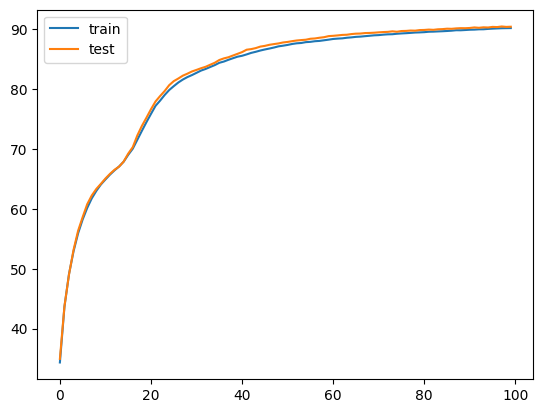

In [16]:
#[MY CODE] train과 test data에 대한 model의 정확도 plot
plot_acc(train_accs_list, test_accs_list, label1='train', label2='test')